In [4]:
#Priprava sistema na Google Colab okolju
!pip install SimpleITK

     |████████████████████████████████| 42.5MB 79kB/s 


In [0]:
!nvidia-smi

Sat Jan 11 11:35:08 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.44       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
#Priprava sistema na Google Colab okolju
!pip3 install tensorflow==1.15 --ignore-installed

     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 3.8MB 36.1MB/s 
     |████████████████████████████████| 112kB 70.5MB/s 
     |████████████████████████████████| 2.4MB 55.6MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 71kB 11.6MB/s 
     |████████████████████████████████| 1.3MB 62.7MB/s 
     |████████████████████████████████| 512kB 55.4MB/s 
     |████████████████████████████████| 20.2MB 155kB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 583kB 55.5MB/s 
     |████████████████████████████████| 327kB 71.4MB/s 
     |████████████████████████████████| 92kB 13.1MB/s 
     |████████████████████████████████| 2.9MB 70.5MB/s 
  Created wheel for absl-py: filename=absl_py-0.9.0-cp36-none-any.whl size=121931 sha256=4906610fc4cfb1fcc757d9160bd2aeda5fd9bd28cd0979b3ab36e9da7baf8934
  Stored in di

In [0]:
#Priprava sistema na Google Colab okolju
!pip3 show tensorflow

Name: tensorflow
Version: 1.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: gast, absl-py, termcolor, numpy, wrapt, six, tensorflow-estimator, google-pasta, keras-preprocessing, keras-applications, wheel, opt-einsum, grpcio, tensorboard, astor, protobuf
Required-by: stable-baselines, magenta, fancyimpute


In [5]:
#Priprava sistema na Google Colab okolju - uvoz uporabljenih knjižnic in funkcij
from __future__ import print_function
import os
import numpy as np
import sys
import matplotlib.pyplot as plt
import SimpleITK as itk
import random
import tensorflow as tf
import csv

from scipy.ndimage.filters import gaussian_filter
from scipy.ndimage import convolve
#sys.path.append('/opt/medana') samo na Orehu, ker je lokalno orodje
#from common.filters import OrientImage

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Conv3D, MaxPool3D, Softmax, Activation, BatchNormalization
from keras import backend as K
from keras.callbacks import Callback
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import optimizers
from keras.utils import np_utils

import pandas as pd

from os.path import exists, join
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import shuffle
#from amslib import load_mri_brain_data

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

seed = 42
random.seed = seed
np.random.seed = seed

#funkcije
def img2array(img):
    return np.squeeze(itk.GetArrayFromImage(img))

def array2img(array):
    return np.squeeze(itk.GetImageFromArray(array))

def slicer(img): 
  #funkcija za prikaz rezin slike za lažje razumevanje obdelave
    #print('Velikost slike je {}'.format(img.GetSize()))
    velikost = img.GetSize()
    rezina_x = img[int(velikost[0]/2),:,:]
    rezina_y = img[:,int(velikost[1]/2),:]
    rezina_z = img[:,:,int(velikost[2]/2)]
    rezine = [rezina_x, rezina_y, rezina_z]
    return rezine

Using TensorFlow backend.


In [0]:
#!pip uninstall keras
#!pip install keras==2.3.1
# ne nujno potrebno, saj je Keras 2.2.4 vredu za tensorflow 1.15

2.0.0
2.2.4-tf
Uninstalling Keras-2.2.5:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/Keras-2.2.5.dist-info/*
    /usr/local/lib/python3.6/dist-packages/docs/*
    /usr/local/lib/python3.6/dist-packages/keras/*
  Would not remove (might be manually added):
    /usr/local/lib/python3.6/dist-packages/docs/md_autogen.py
    /usr/local/lib/python3.6/dist-packages/docs/update_docs.py
Proceed (y/n)? y
  Successfully uninstalled Keras-2.2.5
     |████████████████████████████████| 378kB 8.9MB/s 


In [0]:
print(tf.__version__)
print(keras.__version__)

1.15.0
2.2.4-tf


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# uvoz podatkov z drive-a

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
#priprava referenčne tabele vseh orientacij v one hot encoded label
orientacije = ['AIL', 'AIR', 'ALI', 'ALS', 'ARI', 'ARS', 'ASL', 'ASR',
               'IAL', 'IAR', 'ILA', 'ILP', 'IPL', 'IPR', 'IRA', 'IRP',
               'LAI', 'LAS', 'LIA', 'LIP', 'LPI', 'LPS', 'LSA', 'LSP',
               'PIL', 'PIR', 'PLI', 'PLS', 'PRI', 'PRS', 'PSL', 'PSR',
               'RAI', 'RAS', 'RIA', 'RIP', 'RPI', 'RPS', 'RSA', 'RSP',
               'SAL', 'SAR', 'SLA', 'SLP', 'SPL', 'SPR', 'SRA', 'SRP']

encoder = preprocessing.LabelEncoder()
encoder.fit(orientacije)
encoded_Y = encoder.transform(orientacije)
tabela_orientacij = []
hot_label = np_utils.to_categorical(encoded_Y)
for k in range(48):
    tabela_orientacij.append(hot_label[k])
print(np.shape(tabela_orientacij))

tabela_orientacij = np.asarray(tabela_orientacij, dtype = 'int')
print(np.shape(tabela_orientacij))
#print(tabela_orientacij[2]) test

(48, 48)
(48, 48)
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


In [0]:
# PRIPRAVA MATRIK
# Ta cell pripravi matriko slik in matriko razredov. Sama obdelava in priprava je v okolju Google Colab zelo časovno potratna, zato je bil za del narejen na strežniku Oreh.
from tqdm import tqdm
from google.colab import drive
traindata ='/content/drive/My Drive/Colab Notebooks/t1-images-nove'
#drive.mount(traindata)
#traindata = "./ixi_data/t1-images-nnn"
td = os.listdir(traindata)
print('V mapi {:s} je {:d} podmap.'.format(traindata, len(td)))
#tsd = os.listdir(testdata)
#print('V mapi {:s} je {:d} podmap.'.format(testdata, len(tsd)))
X = []
train_karray = []
images = []
y  = []
Y = []
n = 0
for i in tqdm(orientacije):
    for files in os.listdir(traindata + '/' + i):
        if files.endswith("nii.gz"): 
            #img = load_img(traindata + '/' + i, target_size=(32, 32, 32))
            img = itk.ReadImage(join(traindata + '/' + i, files))
            images.append(img)
            #print(n)
            y.append(tabela_orientacij[orientacije.index(i)])
            n = n+1
print('Prva tocka')        
#print(len(images))
t1_array = np.stack([np.squeeze(itk.GetArrayFromImage(data)) for data in images])

train_karray = t1_array[:, :, :, :, np.newaxis]
print('Druga tocka')
channel_axis = -1
X = train_karray

m = np.max(X)
mi = np.min(X)
X = (X - mi) / (m - mi)

#X = np.asarray(X)
print('Velikost preoblikovanega TRAIN polja: {}'.format(X.shape))
Y = np.asarray(y)
print('Velikost preoblikovanega label: {}'.format(Y.shape))






  0%|          | 0/48 [00:00<?, ?it/s]

V mapi /content/drive/My Drive/Colab Notebooks/t1-images-nove je 50 podmap.






  2%|▏         | 1/48 [00:03<02:40,  3.43s/it]



  4%|▍         | 2/48 [00:06<02:39,  3.47s/it]



  6%|▋         | 3/48 [00:10<02:34,  3.44s/it]



  8%|▊         | 4/48 [00:13<02:28,  3.38s/it]



 10%|█         | 5/48 [00:17<02:25,  3.38s/it]



 12%|█▎        | 6/48 [00:20<02:22,  3.40s/it]



 15%|█▍        | 7/48 [00:23<02:17,  3.36s/it]



 17%|█▋        | 8/48 [00:27<02:14,  3.35s/it]



 19%|█▉        | 9/48 [00:30<02:10,  3.34s/it]



 21%|██        | 10/48 [00:33<02:08,  3.38s/it]



 23%|██▎       | 11/48 [00:37<02:05,  3.39s/it]



 25%|██▌       | 12/48 [00:40<02:03,  3.42s/it]



 27%|██▋       | 13/48 [00:44<01:59,  3.41s/it]



 29%|██▉       | 14/48 [00:47<01:56,  3.44s/it]



 31%|███▏      | 15/48 [00:51<01:54,  3.46s/it]



 33%|███▎      | 16/48 [00:54<01:50,  3.46s/it]



 35%|███▌      | 17/48 [01:13<04:07,  7.99s/it]



 38%|███▊      | 18/48 [03:59<27:43, 55.44s/it]



 40%|███▉      | 19/48 [06:44<42:46, 88.51s/it]



 42%|████▏     | 20/48 [09:23<51:10,

SystemError: ignored

In [0]:
np.save() #uporabljena funkcija v okolju Oreh, z namenom, da generiranje matrik X in Y ne bi bilo potrebno vsakič, saj traja veliko časa

In [0]:
#importanje matrik Y in X
from google.colab import files
#uploaded = files.upload('X')
X = np.load('/content/drive/My Drive/Colab Notebooks/X.npy')
Y = np.load('/content/drive/My Drive/Colab Notebooks/Y.npy')

In [0]:
# ker sta matriki sestavljeni po vrsti, jih je potrebno preshufflat - izmenjat vrstni red podatkov. to naredim nekajkrat, da se podatki dobro zmešajo.
for i in range(10):
  X, Y = shuffle(X,Y)

In [10]:
# genriranje train in test podatkov, tako da vse podatke razdelim na train in test s funkcijo
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=30, test_size=0.1)
print('Velikost učne zbirke slik: {}'.format(np.shape(X_train)))
print('Oznake učne zbirke: {}'.format(np.shape(y_train)))
print('Velikost testne zbirke slik: {}'.format(np.shape(X_test)))
print('Oznake testne zbirke: {}'.format(np.shape(y_test)))

Velikost učne zbirke slik: (9720, 32, 32, 32, 1)
Velikost labelov učne zbirke: (9720, 48)
Velikost testne zbirke slik: (1080, 32, 32, 32, 1)
Velikost labelov testne zbirke: (1080, 48)


In [0]:
#določanje parametrov za nevronsko mrežo

# IZ VAJ:
#X: numpy polje učnih podatkov
# Y: numpy polje učnih oznak
# batch_size: število vzorcev za izračun gradienta uteži modela
# epochs: število ponovitev učenja, pri čemer ena epoha predstavlja posodobitve modela z uporabo vseh vhodnih podatkov
# verbose: stopnja podrobnosti izpisovanju poteka učenja (0-brez,1-prikaz napredka,2-ena vrstica na epoho)
# validation_data: par numpy polj s testnimi podatki in oznakami, za spremljanje zmožnosti posploševanja modela
# callbacks: seznam prilagojenih povratnih klicev za diagnostiko poteka učenja

NUM_CLASSES = 48
BATCH_SIZE = 100
NUM_EPOCHS = 100
STEPE = 20
STEPV = 10
lr = 1e-3

In [12]:
# MOJ MODEL
model=Sequential()
model.add(Conv3D(input_shape=X_train.shape[1:],filters = 16,kernel_size=(3,3,3),activation="relu"))
model.add(Conv3D(filters = 16,kernel_size=(3,3,3),activation="relu"))
model.add(MaxPool3D(pool_size=(2,2,2)))

model.add(Conv3D(32,(3,3,3),activation="relu"))
model.add(MaxPool3D(pool_size=(2,2,2)))

model.add(Conv3D(64,(3,3,3),activation="relu"))
model.add(MaxPool3D(pool_size=(2,2,2)))

model.add(Dropout(rate=0.75))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(NUM_CLASSES,activation="softmax"))
model.summary()
opt = optimizers.RMSprop(lr) 
#opt=optimizers.SGD(lr, momentum=0.9),   eden izmed možnih optimizerjev, ki so bili potestirani
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=opt, 
              metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 30, 30, 30, 16)    448       
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 28, 28, 28, 16)    6928      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 14, 14, 14, 16)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 12, 12, 12, 32)    13856     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 6, 6, 6, 32)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 4, 4, 4, 64)       55360     
_

In [13]:
# Učenje modela

# pripravi izpis kriterijskih funkcij za Tensorboard
run_count = 0
while exists('./graphs/' + str(run_count)):
    run_count += 1

tbCallBack = keras.callbacks.TensorBoard(
    log_dir='./graphs/' + str(run_count), 
    histogram_freq=0, 
    write_graph=True, 
    write_images=True)

class TestCallback(Callback):
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

#model.fit(X_train, y_train,
#          batch_size=BATCH_SIZE,
#          epochs=NUM_EPOCHS,
#          verbose=1,
#          validation_data=(X_test, y_test))
#model.summary()

history = model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=NUM_EPOCHS,
          #steps_per_epoch = STEPE,
          #validation_steps = STEPV,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[tbCallBack, TestCallback((X_test, y_test))])
model.save_weights("model.h5")




Train on 9720 samples, validate on 1080 samples
Epoch 1/100





9720/9720 [==============================] - 28s 3ms/step - loss: 3.8722 - acc: 0.0191 - val_loss: 3.8747 - val_acc: 0.0167

Testing loss: 3.8747160258116544, acc: 0.016666666666666666

Epoch 2/100
9720/9720 [==============================] - 13s 1ms/step - loss: 3.8451 - acc: 0.0258 - val_loss: 3.7578 - val_acc: 0.0444

Testing loss: 3.757796730818572, acc: 0.044444444444444446

Epoch 3/100
9720/9720 [==============================] - 14s 1ms/step - loss: 3.6212 - acc: 0.0586 - val_loss: 3.3919 - val_acc: 0.0880

Testing loss: 3.391930698465418, acc: 0.08796296299055771

Epoch 4/100
9720/9720 [==============================] - 14s 1ms/step - loss: 3.3429 - acc: 0.1062 - val_loss: 3.1634 - val_acc: 0.1315

Testing loss: 3.16340823703342, acc: 0.13148148150907624

Epoch 5/100
9720/9720 [==============================] - 14s 1ms/step - loss: 3.2024 - acc: 0.1381 - val_loss: 3.1080 - val_acc: 0.1611

Testing loss: 3.10798

Učna zbirka
	loss: 2.821063514403355
	accuracy: 0.2874485596953106
Testna zbirka
	loss: 2.8874809053209094
	accuracy: 0.2685185182977606


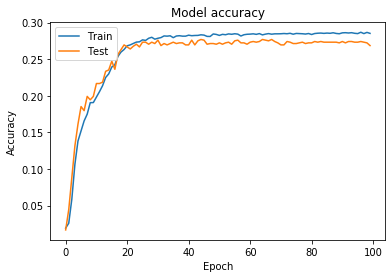

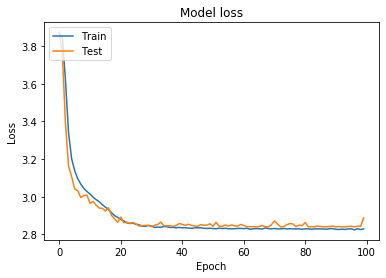

In [15]:
model.load_weights("model.h5")

# Primerjava vrednosti kriterijskih funkcij med učno in testno zbirko
score = model.evaluate(X_train, y_train, verbose=0)
print('Učna zbirka')
print('\tloss:', score[0])
print('\taccuracy:', score[1])
score = model.evaluate(X_test, y_test, verbose=0)
print('Testna zbirka')
print('\tloss:', score[0])
print('\taccuracy:', score[1])

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
train_and_test(learning_rate=lr, activation='relu', epochs=NUM_EPOCHS)

In [107]:
import seaborn as sb
model.load_weights("model.h5")

orientacije1 = ('AIL', 'AIR', 'ALI', 'ALS', 'ARI', 'ARS', 'ASL', 'ASR',
               'IAL', 'IAR', 'ILA', 'ILP', 'IPL', 'IPR', 'IRA', 'IRP',
               'LAI', 'LAS', 'LIA', 'LIP', 'LPI', 'LPS', 'LSA', 'LSP',
               'PIL', 'PIR', 'PLI', 'PLS', 'PRI', 'PRS', 'PSL', 'PSR',
               'RAI', 'RAS', 'RIA', 'RIP', 'RPI', 'RPS', 'RSA', 'RSP',
               'SAL', 'SAR', 'SLA', 'SLP', 'SPL', 'SPR', 'SRA', 'SRP')
orientacije2 = []
k = []
m = []

for j in range(48):
  orientacije2.append(j)
  j = j+1
  
#print(orientacije2)

# Izvedi predikcijo
ynew = model.predict_classes(X_test)

# show the inputs and predicted outputs
for i in range(len(X_test)):
  m.append(ynew[i])
  print("Predvidena orientacija: %s" % (orientacije1[ynew[i]]))
  k.append(np.argmax(y_test[i]))
  print('Resnična orientacija:', orientacije1[k[i]])

k = np.asarray(k)
m = np.asarray(m)
print(k.shape)
print(m.shape)


# https://seaborn.pydata.org/generated/seaborn.heatmap.html
heat_map = sb.heatmap(m, k)


Predvidena orientacija: SAR
Resnična orientacija: RSA
Predvidena orientacija: SAR
Resnična orientacija: PRI
Predvidena orientacija: SAR
Resnična orientacija: SAL
Predvidena orientacija: LAS
Resnična orientacija: LAS
Predvidena orientacija: SAR
Resnična orientacija: LIP
Predvidena orientacija: SAR
Resnična orientacija: SAL
Predvidena orientacija: PIR
Resnična orientacija: PIR
Predvidena orientacija: SAR
Resnična orientacija: PSR
Predvidena orientacija: PIL
Resnična orientacija: PIL
Predvidena orientacija: LAI
Resnična orientacija: LAI
Predvidena orientacija: PIR
Resnična orientacija: PIR
Predvidena orientacija: SAR
Resnična orientacija: PRS
Predvidena orientacija: SAR
Resnična orientacija: IAL
Predvidena orientacija: SAR
Resnična orientacija: PIL
Predvidena orientacija: SAR
Resnična orientacija: ARI
Predvidena orientacija: SAR
Resnična orientacija: ILP
Predvidena orientacija: SAR
Resnična orientacija: ALI
Predvidena orientacija: SAR
Resnična orientacija: RPI
Predvidena orientacija: SAR


IndexError: ignored

In [0]:
#VGG MODEL
model = Sequential()
model.add(Conv3D(input_shape=(32,32,32,1),filters=16,kernel_size=(3,3,3),padding="same", activation="relu"))
model.add(Conv3D(filters=16,kernel_size=(3,3,3),padding="same", activation="relu"))
model.add(MaxPool3D(pool_size=(2,2,2),strides=(2,2,2)))
model.add(Conv3D(filters=32, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Conv3D(filters=32, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Dropout(0.5))
model.add(MaxPool3D(pool_size=(2,2,2),strides=(2,2,2)))
model.add(Conv3D(filters=64, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Conv3D(filters=64, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Conv3D(filters=64, kernel_size=(3,3,3), padding="same", activation="relu"))

model.add(Dropout(0.5))
model.add(MaxPool3D(pool_size=(2,2,2),strides=(2,2,2)))
model.add(Conv3D(filters=128, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Conv3D(filters=128, kernel_size=(3,3,3), padding="same", activation="relu"))

model.add(Dropout(0.5))
model.add(MaxPool3D(pool_size=(2,2,2),strides=(2,2,2)))
model.add(Conv3D(filters=128, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Conv3D(filters=128, kernel_size=(3,3,3), padding="same", activation="relu"))
model.add(Conv3D(filters=128, kernel_size=(3,3,3), padding="same", activation="relu"))

model.add(Dropout(0.5))
model.add(MaxPool3D(pool_size=(2,2,2),strides=(2,2,2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(48, activation='softmax'))

opt = optimizers.RMSprop(lr) #poglej še 
#opt=optimizers.SGD(lr, momentum=0.9)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_55 (Conv3D)           (None, 32, 32, 32, 16)    448       
_________________________________________________________________
conv3d_56 (Conv3D)           (None, 32, 32, 32, 16)    6928      
_________________________________________________________________
max_pooling3d_26 (MaxPooling (None, 16, 16, 16, 16)    0         
_________________________________________________________________
conv3d_57 (Conv3D)           (None, 16, 16, 16, 32)    13856     
_________________________________________________________________
conv3d_58 (Conv3D)           (None, 16, 16, 16, 32)    27680     
_________________________________________________________________
dropout_21 (Dropout)         (None, 16, 16, 16, 32)    0         
_________________________________________________________________
max_pooling3d_27 (MaxPooling (None, 8, 8, 8, 32)      